In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
train_file = pd.read_csv(r"C:\Users\sskou\OneDrive\Pictures\Desktop\mnist_train.csv")
test_file = pd.read_csv(r"C:\Users\sskou\OneDrive\Pictures\Desktop\mnist_test.csv")

In [3]:
train_file.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_file.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
np.sort(train_file.label.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [6]:
num_train,num_validation = int(len(train_file)*0.8),int(len(train_file)*0.2)

In [7]:
num_train,num_validation

(48000, 12000)

In [8]:
x_train,y_train=train_file.iloc[:num_train,1:].values,train_file.iloc[:num_train,0].values

In [9]:
x_validation,y_validation=train_file.iloc[num_train:,1:].values,train_file.iloc[num_train:,0].values

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


# Training Data

Label: 6


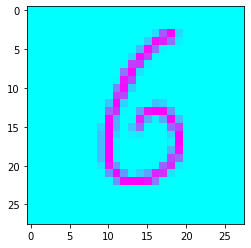

In [11]:
index=18
print("Label: " + str(y_train[index]))
plt.imshow(x_train[index].reshape((28,28)),cmap='cool')
plt.show()

In [12]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [13]:
prediction_validation = clf.predict(x_validation)

In [14]:
print("Validation Accuracy: " + str(accuracy_score(y_validation,prediction_validation)))

Validation Accuracy: 0.9710833333333333


In [15]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_validation,prediction_validation)))

Validation Confusion Matrix: 
[[1181    0    3    0    0    0    2    0    6    2]
 [   0 1257    4    3    2    0    1    1    3    1]
 [   3    2 1158    5    4    0    4    7   10    3]
 [   2    0    8 1199    0   13    1    3    9    7]
 [   0    4    1    0 1153    0    3    1    2   23]
 [   5    0    4   13    2 1044   15    0    6    8]
 [   2    0    1    1    1    5 1158    0    2    0]
 [   2    6   13    1    4    1    0 1258    0   12]
 [   3    5    6    6    6    7    5    1 1154    5]
 [   6    2    2   13    8    5    0   11    9 1091]]


Wrong predictions

Predicted 8 as 6


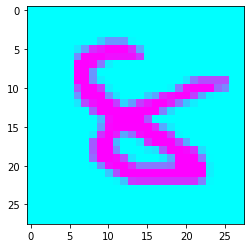

In [16]:
index=9
print("Predicted " + str(y_validation[y_validation!=prediction_validation][index]) + " as " + 
     str(prediction_validation[y_validation!=prediction_validation][index]))
plt.imshow(x_validation[y_validation!=prediction_validation][index].reshape((28,28)),cmap='cool')